# Homework 3 - Problem 2 - Objective analysis course
Correlation vs composite analysis
For variable X I used the relative humidity of scents exp=23 date=0627
For variable Y I used the number of CHN ions in the exp=23 date=0627

## Importing libraries

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from icecream import ic
import pandas as pd
import glob

# Defining functions

In [103]:

def standardize_series(series: np.ndarray) -> np.ndarray:
    # standardize a series
    return (series - np.mean(series)) / np.std(series)

## Loading data

In [104]:
RH = pd.read_csv("RH.csv", skiprows=0)

In [105]:
CHN = pd.read_csv("CHN.csv", skiprows=0)

In [106]:
RH

,t,RH
0,0.000000,56.86670
1,0.000000,56.79956
2,0.000000,56.77607
3,0.016667,56.75542
4,0.016667,56.71758
...,...,...
785,4.983333,50.40065
786,4.983333,50.42548
787,5.000000,50.42212
788,5.000000,50.48437


In [107]:
CHN

,t,CHN
0,0.004722,68.8912
1,0.021944,47.0590
2,0.039167,74.4746
3,0.056667,66.8305
4,0.073889,50.6278
...,...,...
283,4.923889,47.6230
284,4.941111,44.8478
285,4.958333,26.5703
286,4.975833,48.6816


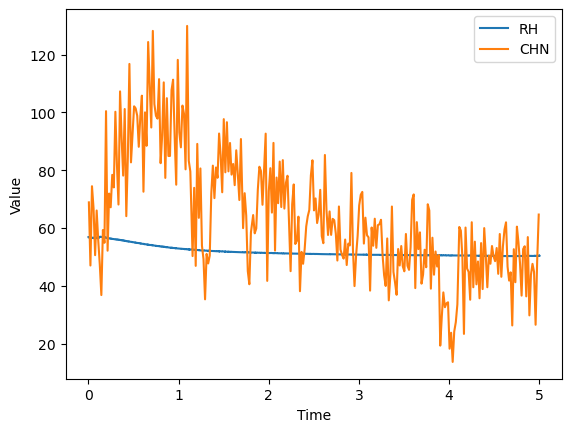

In [108]:
# plotting the data
plt.plot(RH['t'], RH['RH'], label='RH')
plt.plot(CHN['t'], CHN['CHN'], label='CHN')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [109]:
# standardizing the data
RH_standard = standardize_series(RH['RH'])
CHN_standard = standardize_series(CHN['CHN'])

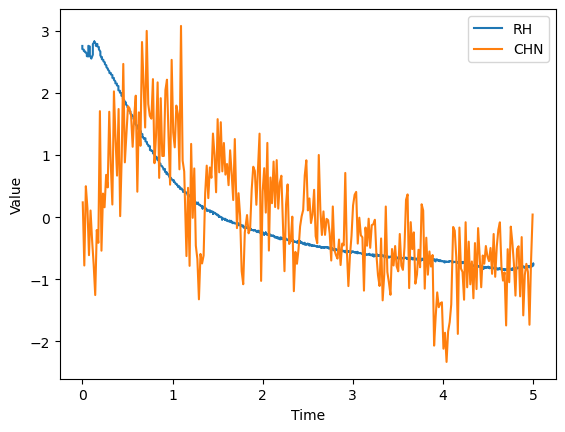

In [110]:
# plotting the standardized data
plt.plot(RH['t'], RH_standard, label='RH')
plt.plot(CHN['t'], CHN_standard, label='CHN')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# putting the RH and CHN in the same time reference

In [111]:
# finding the common time reference
# interpolating the RH data to the CHN time reference
RH_interpolated = np.interp(CHN['t'], RH['t'], RH_standard)


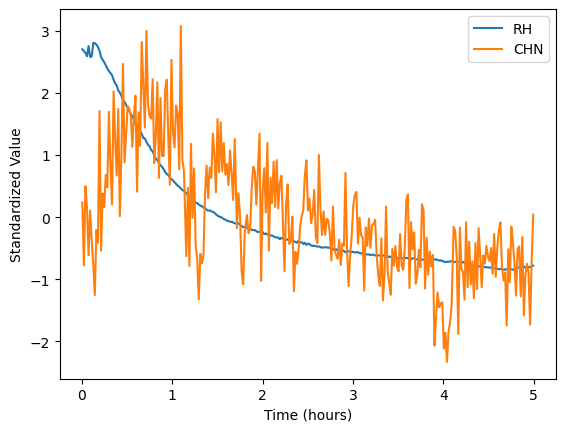

In [112]:
# plotting the interpolated data
plt.plot(CHN['t'], RH_interpolated, label='RH')
plt.plot(CHN['t'], CHN_standard, label='CHN')
plt.xlabel('Time (hours)')
plt.ylabel('Standardized Value')
plt.legend()
plt.savefig('RH_CHN.png')
plt.show()


In [113]:
# Setting CHN as Y and interpolated-standardized RH as X
X = RH_interpolated
Y = CHN['CHN'] # the original CHN data 
Y = Y.to_numpy() #transfering it Y from pandas to numpy array


In [114]:
print(X)
print(Y)

[ 2.70617422e+00  2.67450330e+00  2.64997945e+00  2.59241811e+00
  2.75592687e+00  2.58204560e+00  2.58777625e+00  2.80802270e+00
  2.80366083e+00  2.77960142e+00  2.74465780e+00  2.67901538e+00
  2.57760102e+00  2.53674769e+00  2.49728723e+00  2.44938145e+00
  2.39598781e+00  2.35287894e+00  2.32212758e+00  2.29040327e+00
  2.21284728e+00  2.15594867e+00  2.12226227e+00  2.04315561e+00
  2.00593639e+00  1.95409709e+00  1.89979820e+00  1.85830284e+00
  1.80867008e+00  1.76946991e+00  1.71163124e+00  1.65977976e+00
  1.62984718e+00  1.57195026e+00  1.49578513e+00  1.47269234e+00
  1.41117769e+00  1.38899969e+00  1.34099664e+00  1.27575766e+00
  1.26916169e+00  1.21229824e+00  1.16433604e+00  1.14328585e+00
  1.07885596e+00  1.06337935e+00  9.91231164e-01  9.46587743e-01
  9.19828233e-01  8.75862380e-01  8.34167540e-01  8.14300292e-01
  7.68693643e-01  7.27352057e-01  6.94540235e-01  6.77645291e-01
  6.37390946e-01  6.12446065e-01  5.91539480e-01  5.61671568e-01
  5.33147526e-01  5.07419

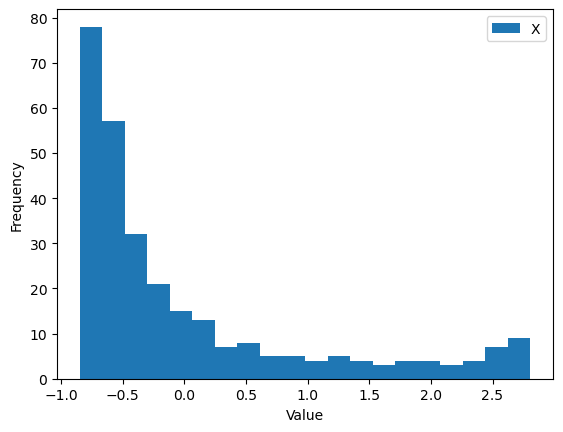

In [115]:
# plotting the histogram data
plt.hist(X, bins=20, label='X')
# plt.hist(Y, bins=20, label='Y')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [116]:
# calculating the correlation and regression coefficients
correlation = np.corrcoef(X, Y)
regression = np.polyfit(X, Y, 1)


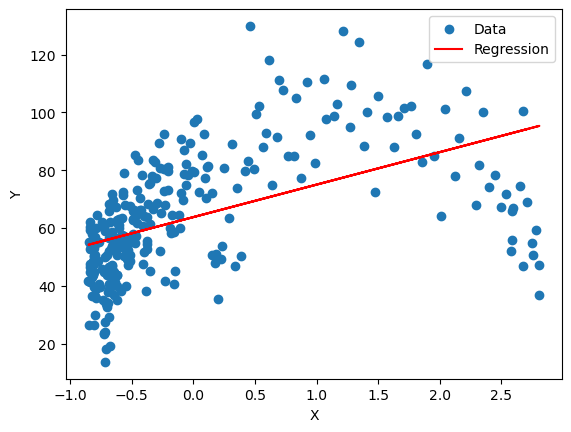

In [117]:
# plotting the data
plt.scatter(X, Y, label='Data')
plt.plot(X, regression[0] * X + regression[1], color='red', label='Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [118]:
# calculating the correlation and regression coefficients
correlation_2 = np.corrcoef(X, Y)
regression_2 = np.polyfit(X, Y, 2)

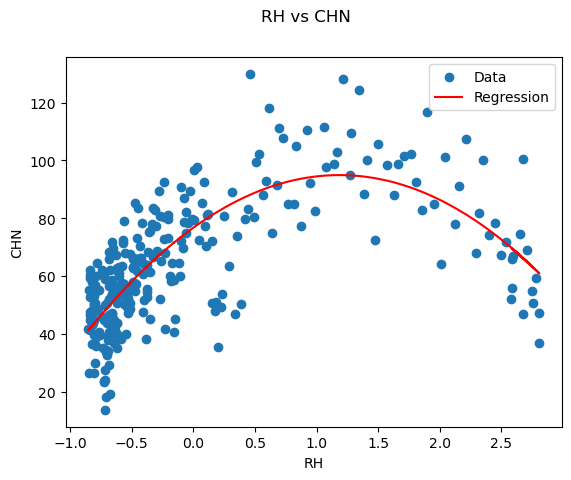

In [119]:
# plotting the data
plt.scatter(X, Y, label='Data')
plt.plot(X, regression_2[0] * X**2 + regression_2[1] * X + regression_2[2], color='red', label='Regression')    
plt.xlabel('RH')
plt.ylabel('CHN')
# suptitle is the title of the plot
plt.suptitle('RH vs CHN')
plt.legend()
plt.savefig('RH_CHN_regression.png')
plt.show()


In [120]:
RH
CHN

,t,CHN
0,0.004722,68.8912
1,0.021944,47.0590
2,0.039167,74.4746
3,0.056667,66.8305
4,0.073889,50.6278
...,...,...
283,4.923889,47.6230
284,4.941111,44.8478
285,4.958333,26.5703
286,4.975833,48.6816


ValueError: x and y must be the same size

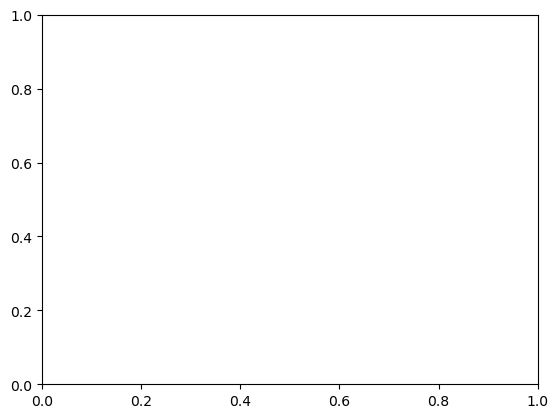

In [121]:
# plotting the data
plt.scatter(RH, CHN, label='Data')
plt.plot(X, regression_2[0] * X**2 + regression_2[1] * X + regression_2[2], color='red', label='Regression')    
plt.xlabel('X')
plt.ylabel('Y')
plt.suptitle('RH vs CHN')
plt.legend()
plt.show()

In [ ]:
print('test')

## Composite analysis
Because there is no data less than -1 standard deviation, I am calculating the composite analysis for X > 0.5 standard deviation and X < -0.5 standard deviation    

In [ ]:
# calculating the composite analysis
# Calculating the mean of Y when X exceeds 0.5 standard deviation
Y_mean = np.mean(Y[X > 0.5])
# Calculating the mean of Y when X is below -1 standard deviation
Y_mean_2 = np.mean(Y[X < -0.5])

In [ ]:
# plotting the data
plt.scatter(X[X>0.5], Y[X>0.5], label='Data X>0.5', color='green')
plt.scatter(X[X<-0.5], Y[X<-0.5], label='Data X<0.5', color='blue')
plt.scatter(X[(X>-0.5) & (X<0.5)], Y[(X>-0.5) & (X<0.5)], label='Data', color='gray')
plt.plot(X, regression[0] * X + regression[1], color='red', label='Regression')
plt.axhline(Y_mean, color='green', linestyle='--', label='Mean when X > 0.5 std')
plt.axhline(Y_mean_2, color='blue', linestyle='--', label='Mean when X < -0.5 std')
plt.xlabel('X')
plt.ylabel('Y')
# putting the legend outside the plot on the right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
# calculating the composite analysis

In [ ]:
# plotting the data
plt.scatter(X[X>1], Y[X>1], label='Data X>1', color='green')
plt.scatter(X[X<-0.5], Y[X<-0.5], label='Data X<0.5', color='blue')
plt.scatter(X[(X>-0.5) & (X<1)], Y[(X>-0.5) & (X<1)], label='Data', color='gray')
plt.plot(X, regression[0] * X + regression[1], color='red', label='Regression')
plt.axhline(np.mean(Y[X > 1]) , color='green', linestyle='--', label='Mean when X > 0.5 std')
plt.axhline(np.mean(Y[X < -0.5]), color='blue', linestyle='--', label='Mean when X < -0.5 std')
plt.xlabel('X')
plt.ylabel('Y')
# putting the legend outside the plot on the right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:


# # calculating the autocorrelation of X
# X_autocorrelation = np.correlate(X, X, mode='full')
# Y_autocorrelation = np.correlate(Y, Y, mode='full')
# # plotting the autocorrelation
# plt.plot(X_autocorrelation)
# plt.plot(Y_autocorrelation)
